# Getting started - Requirements
Python (🐍):  This assumes that you have a python environment installed. If you haven't, we recommend installing [Anaconda](https://docs.anaconda.com/anaconda/install/).

FPsim (♀️): This tutorial uses [FPsim v2.0](https://github.com/fpsim/fpsim/tree/rc2.0-methodtime). 

To install, you first need to clone or download the a copy of the source code from https://github.com/fpsim/fpsim
 
```
git clone -b rc2.0-methodtime --single-branch https://github.com/fpsim/fpsim.git
cd fpsim
pip install -e .
```

If it worked, you should be able to import fpsim with `import fpsim as fp`.

<div class="alert alert-info">
    
An interactive version of this notebook is available on [Google Colab](https://colab.research.google.com/github/fpsim/fpsim/blob/main/docs/tutorials/T4_intervention_eligibility.ipynb?install=fpsim) or [Binder](https://mybinder.org/v2/gh/fpsim/fpsim/HEAD?labpath=docs%2Ftutorials%2FT4_intervention_eligibility.ipynb).
    
</div>

## Interventions - how to select a specific subpopulation

At this point, you should now be able to run multiple simulations with distinct interventions, using default or custom parameters and plot the results. So far we've seen interventions that target a model parameter. Now we will see how we can we specify a function that tells FPsim who will receive the intervention. First, import the model and set your default settings.

In [4]:
import fpsim as fp
import sciris as sc
import matplotlib.pyplot as plt

Starsim 2.0.0 (2024-10-01) — © 2023-2024 by IDM


In [5]:
pars = dict(
    n_agents   = 1_000,
    location   = 'kenya',
    start_year = 2000, 
    end_year   = 2012,
    exposure_factor = 1.0  # Overall scale factor on probability of becoming pregnant
)

Now, we will modify a 'state' value of all eligible women. To see all the states you can select based on, run this code:

In [7]:
from fpsim.defaults import person_defaults
for i, (key, state) in enumerate(person_defaults.items()): print(f"{i}: {key}")

0: uid
1: age
2: age_by_group
3: sex
4: alive
5: on_contra
6: method
7: ti_contra
8: barrier
9: ever_used_contra
10: parity
11: pregnant
12: fertile
13: sexually_active
14: sexual_debut
15: sexual_debut_age
16: fated_debut
17: first_birth_age
18: lactating
19: gestation
20: preg_dur
21: stillbirth
22: miscarriage
23: abortion
24: pregnancies
25: months_inactive
26: postpartum
27: mothers
28: short_interval
29: secondary_birth
30: postpartum_dur
31: lam
32: breastfeed_dur
33: breastfeed_dur_total
34: remainder_months
35: personal_fecundity
36: paid_employment
37: decision_wages
38: decision_health
39: decision_purchase
40: buy_decision_major
41: buy_decision_daily
42: buy_decision_clothes
43: decide_spending_partner
44: has_savings
45: has_fin_knowl
46: has_fin_goals
47: sexual_autonomy
48: financial_autonomy
49: decision_making
50: fertility_intent
51: categorical_intent
52: intent_to_use
53: partnered
54: partnership_age
55: urban
56: wealthquintile
57: edu_objective
58: edu_attainmen

### Increase the number of women who have education

The `change_people_state` intervention can be used to change 'states' or attributes of women. Let's see what would hapen if we increase education. In FPsim, education is defined based on an education objective and education attainment. The education objective is given to each woman when she enters the model. During her school age years, she gains one year of educationl attainment each year until she reaches her objective. This trajectory can be interrupted if she experiences a pregnancy during those years. 

First, we will identify all women who have a goal to achieve at least one year of education.

In [9]:
def select_undereducated(sim):
    """ Select women who have a goal to achieve at least 1 year of education """
    is_eligible = ((sim.people.is_female) &
                   (sim.people.alive)     & 
                   (sim.people.edu_objective > 0))
    return is_eligible

Now, define a baseline simulation, s0, with no changes.

In [11]:
edu = fp.Education()
s0 = fp.Sim(pars=pars, education_module=edu, label='Baseline')

Next, we define our education change intervention. This intervention finds a of the eligible women (those with a goa of achieveing at least 1 year of education), and gives all of them 15 years of education, starting in the year 2010. We define a simulaiton, s1, with this educaiton intervention.

In [13]:
change_education = fp.change_people_state(
                        'edu_attainment',
                        eligibility=select_undereducated,
                        years=2010.0,
                        new_val=15,  # Give all selected women 15 years of education
                    )
edu = fp.Education()
s1 = fp.Sim(pars=pars, 
            education_module=edu, 
            interventions=change_education,
            label='Increased education')

Run a multile simulation run with msim to get the results of both of these simulations.

In [15]:
msim = fp.parallel(s0, s1)
s0, s1 = msim.sims

Plot the resulting education levels.

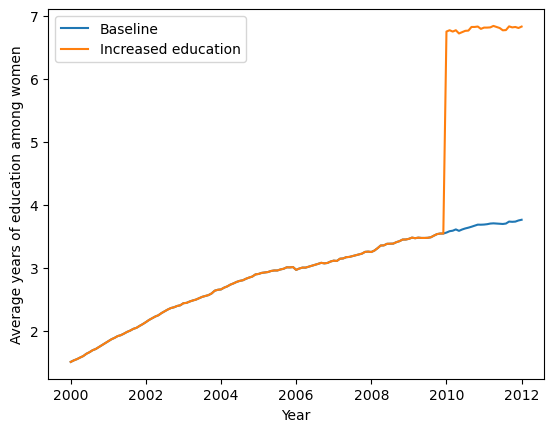

In [17]:
plt.plot(s0.results.t, s0.results.edu_attainment, label=s0.label)
plt.plot(s1.results.t, s1.results.edu_attainment, label=s1.label)
plt.ylabel('Average years of education among women')
plt.xlabel('Year')
plt.legend()